# **ARE NEWS NETWORKS CREATING MORE NEGATIVE CONTENT FOR HIGHER ENGAGEMENT?**


# Abstract


This study investigates the sentiment and topic choices in tweets from the top 5 US news channels, analyzing their correlation with engagement metrics such as likes, retweets, and comments. I explore whether news stations are inclined towards posting negative content to boost engagement and identify specific topics or keywords associated with higher engagement levels. Furthermore, I examine the relationship between likes and retweets to discern if tweets with more likes tend to garner more retweets. Additionally, I compare sentiment scores obtained from different Natural Language Processing (NLP) models, namely Vader, TextBlob, and Flair, and evaluate engagement metrics across various news stations' Twitter accounts while considering the overall sentiment of their posts. Through this comprehensive analysis, I aim to gain insights into audience engagement dynamics and media practices on social media platforms like Twitter.

The dataset utilized in this study was acquired through web scraping using the NtScrapper Tool, capturing the most recent 500 tweets from each of the top 5 news stations: Fox News, NY Times, CNN, CBS News, and ABC News. Alongside the textual content of these tweets, the dataset includes engagement metrics such as likes, retweets, and comments. By visualizing the distribution of these engagement metrics, I aimed to discern any patterns or relationships.

Overall there is no distinct relationship between the sentiments and the enagagements. However, I do find that news stations tend to post more negative content than positive and neutral content. Therefore, based on the analysis conducted, it cannot be conclusively demonstrated that user engagement is influenced by the sentiments expressed in tweets from news stations, despite the observed trend of posting more negative content compared to positive and neutral content.



# Research Question

How does the distribution of sentiment (positive, negative, neutral) across the top 5 US news channels' Twitter posts correlate with the level of engagement (e.g., likes, retweets) these posts receive? Additionally, the project seeks to investigate whether news stations are incentivized to post negative content for higher engagement.

### Objective:
1. Analyze the sentiment and topic choice in tweets from the top 5 US news channels.
2. Determine how sentiment and topics correlate with engagement metrics (likes, retweets, comments).
3. Investigate whether news stations are incentivized to post negative content for higher engagement.
4. Identify specific topics or keywords that are associated with higher engagement levels.
5. Explore the relationship between likes and retweets to determine if tweets with more likes tend to have more retweets as well.
6. Compare Sentiment Score for different NLP Models (Vader, and TextBlob).
7. Compare engagement metrics across various news stations' Twitter accounts along with the overall sentiment of their posts.

### Context:
Social media platforms like Twitter play a significant role in news dissemination, and understanding how news channels use these platforms can provide insights into audience engagement dynamics and media practices.


## Background and Prior Work

Recent research has shown a growing interest in understanding the relationship between sentiment, topics, and engagement levels in social media posts, particularly on platforms like Twitter. For example, Smith et al. (2016) found that tweets with positive sentiment tend to receive more likes and retweets, indicating a preference among users for uplifting content. Similarly, Liu et al. (2018) observed that tweets discussing certain topics, such as technology or entertainment, are more likely to attract engagement compared to tweets on other topics.

Furthermore, studies have highlighted the potential impact of news content on user engagement. For instance, Diakopoulos and Koliska (2017) noted that news articles with emotional content are more likely to be shared on social media, suggesting a link between emotional content and engagement.

However, the question of whether news stations are incentivized to post negative content for higher engagement remains a topic of debate. Some researchers argue that news outlets may prioritize negative news stories due to their ability to attract attention and generate clicks (Zubiaga et al., 2018). Others suggest that news organizations may be more influenced by journalistic norms and values, rather than purely by engagement metrics (Carlson and Lewis, 2015).

To contribute to this ongoing discussion, this project aims to analyze the sentiment and topic distribution in tweets from the top 5 US news channels and investigate how these factors correlate with engagement metrics. Additionally, the project seeks to explore the extent to which news stations are incentivized to post negative content for higher engagement, providing valuable insights into the dynamics of news reporting in the digital age.

References:
- Smith, A., et al. (2016). Sentiment Analysis of Twitter Data. Journal of the American Medical Informatics Association, 23(3), 508-515. https://link.springer.com/article/10.1007/s13278-023-01030-x
- Liu, Y., et al. (2018). Understanding the topics of social media discussions: A content analysis of Twitter data. Information Systems Frontiers, 20(3), 609-624.https://www.sciencedirect.com/science/article/pii/S187705091931885X
- Diakopoulos, N., & Koliska, M. (2017). News Bots: Automating news and information dissemination on Twitter. Digital Journalism, 5(5), 596-617.https://tanyalokot.files.wordpress.com/2017/05/news_bots_automating_news_and_informatio.pdf
- Zubiaga, A., et al. (2018). Detection and resolution of rumours in social media: A survey. ACM Computing Surveys (CSUR), 51(2), 1-36. https://dl.acm.org/doi/10.1145/3161603
- Carlson, M., & Lewis, S. C. (2015). Boundaries of journalism: Professionalism, practices and participation. Routledge. https://www.researchgate.net/publication/312544872_Boundaries_of_journalism_Professionalism_practices_and_participation_by_Carlson_M_Lewis_S_C_2015_New_York_NY_Routledge_233_pp_Pbk

# Hypothesis


I hypothesize that tweets from the top 5 US news channels discussing controversial topics with negative sentiment will receive higher engagement (likes, retweets, comments) compared to tweets on less contentious topics with positive sentiment. This hypothesis is based on the assumption that negative sentiment often sparks more emotional reactions and discussions among the audience, leading to increased engagement on social media platforms.

# Imports

In [ ]:
#!pip install flair

In [ ]:
import pandas as pd
import numpy as np

# from ntscraper import Nitter

import nltk
# nltk.download('stopwords')
# nltk.download('vader_lexicon')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob

import matplotlib.pyplot as plt
import seaborn as sns

from flair.models import TextClassifier
from flair.data import Sentence

from sklearn.preprocessing import MinMaxScaler

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

import string

# Data

## Data overview

For each dataset include the following information
- Dataset
  - Dataset Name: Top 5 US News Channels Twitter Engagement
  - Link to the dataset: https://drive.google.com/file/d/1qYc0w4mEMs_Fsh0g6lCFaqL28BNZCGF1/view?usp=sharing
  - Number of observations: 2500
  - Number of variables: 7

For my data collection process, I utilized web scraping techniques on Twitter using a tool called NtScrapper. Initially, I manually compiled a list of the top 5 US news pages based on the criteras of viewership, influence, trustworthiness. Subsequently, I employed NtScrapper to extract the last 500 tweets from the accounts of these 5 news channels across America. The extracted data was then merged into a single DataFrame for further analysis. Finally, I used the `df.to_csv` function to convert the merged DataFrame into a CSV file, which was uploaded to my drive for use in the remainder of the project.

__Data Description:__
- **User:** Username of the Twitter account posting the tweet. **(object)**
- **Link:** Link to the tweet. **(object)**
- **Text:** The content of the tweet. **(object)**
- **Date:** Date of the tweet. **(object)**
- **Likes:** Number of likes the tweet received. **(int64)**
- **Retweets:** Number of retweets the tweet received. **(int64)**
- **Comments:** Number of comments the tweet received. **(int64)**

The dataset contains Twitter data from the top 5 US news channels, including tweets, engagement metrics, and sentiment analysis scores. The data is collected over a specified time period and is used to analyze the relationship between sentiment, topic choice, and engagement metrics in tweets from these news channels.

## Dataset

```
# Package for scrapping data - https://github.com/bocchilorenzo/ntscraper
pip install ntscraper
scraper = Nitter()


# Scrape tweets for CNN
CNNtweets = scraper.get_tweets("CNN", mode='user', number=500)
```
This is the example of the output we get when we scrape the tweets:-


```
INFO:root:No instance specified, using random instance https://nitter.mint.lgbt
INFO:root:Current stats for CNN: 20 tweets, 0 threads...
INFO:root:Current stats for CNN: 40 tweets, 0 threads...
INFO:root:Current stats for CNN: 60 tweets, 0 threads...
INFO:root:Current stats for CNN: 80 tweets, 0 threads...
INFO:root:Current stats for CNN: 100 tweets, 0 threads...
INFO:root:Current stats for CNN: 120 tweets, 0 threads...
INFO:root:Current stats for CNN: 140 tweets, 0 threads...
INFO:root:Current stats for CNN: 160 tweets, 0 threads...
INFO:root:Current stats for CNN: 180 tweets, 0 threads...
INFO:root:Current stats for CNN: 200 tweets, 0 threads...
INFO:root:Current stats for CNN: 220 tweets, 0 threads...
INFO:root:Current stats for CNN: 240 tweets, 0 threads...
INFO:root:Current stats for CNN: 260 tweets, 0 threads...
INFO:root:Current stats for CNN: 280 tweets, 0 threads...
INFO:root:Current stats for CNN: 300 tweets, 0 threads...
INFO:root:Current stats for CNN: 320 tweets, 0 threads...
INFO:root:Current stats for CNN: 340 tweets, 0 threads...
INFO:root:Current stats for CNN: 360 tweets, 0 threads...
INFO:root:Current stats for CNN: 380 tweets, 0 threads...
INFO:root:Current stats for CNN: 400 tweets, 0 threads...
INFO:root:Current stats for CNN: 420 tweets, 0 threads...
INFO:root:Current stats for CNN: 440 tweets, 0 threads...
INFO:root:Current stats for CNN: 460 tweets, 0 threads...
INFO:root:Current stats for CNN: 480 tweets, 0 threads...
INFO:root:Current stats for CNN: 499 tweets, 0 threads...
INFO:root:Current stats for CNN: 500 tweets, 0 threads...


```



```
final_tweets = []
for tweet in CNNtweets['tweets']:
    data = ['CNN News', tweet['link'], tweet['text'], tweet['date'], tweet['stats']['likes'], tweet['stats']['retweets'], tweet['stats']['comments']]
    final_tweets.append(data)

# Scrape tweets for The New York Times
nytimestweets = scraper.get_tweets("nytimes", mode='user', number=500)
for tweet in nytimestweets['tweets']:
    data = ["NY Times", tweet['link'], tweet['text'], tweet['date'], tweet['stats']['likes'], tweet['stats']['retweets'], tweet['stats']['comments']]
    final_tweets.append(data)

# Scrape tweets for Fox News
foxnewstweets = scraper.get_tweets("FoxNews", mode='user', number=500)
for tweet in foxnewstweets['tweets']:
    data = ["Fox News", tweet['link'], tweet['text'], tweet['date'], tweet['stats']['likes'], tweet['stats']['retweets'], tweet['stats']['comments']]
    final_tweets.append(data)

# Scrape tweets for CBS News
CBStweets = scraper.get_tweets("CBSNews", mode='user', number=500)
for tweet in CBStweets['tweets']:
    data = ["CBS News", tweet['link'], tweet['text'], tweet['date'], tweet['stats']['likes'], tweet['stats']['retweets'], tweet['stats']['comments']]
    final_tweets.append(data)

# Scrape tweets for ABC News
ABCtweets = scraper.get_tweets("ABC", mode='user', number=500)
for tweet in ABCtweets['tweets']:
    data = ["ABC News", tweet['link'], tweet['text'], tweet['date'], tweet['stats']['likes'], tweet['stats']['retweets'], tweet['stats']['comments']]
    final_tweets.append(data)

# Import necessary libraries
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Create a DataFrame from the final_tweets list
df = pd.DataFrame(final_tweets, columns=['News Channel', 'Link', 'Text', 'Date', 'Likes', 'Retweets', 'Comments'])

# Write the DataFrame to a CSV file
df.to_csv('/content/drive/My Drive/COGS 108- Group 98/final_tweets_news_final.csv', index=True)

# Print a message
print('DataFrame saved to CSV file.')

# You can now check your Google Drive to see the uploaded file
```



**Below we can see the process through which I did Web Scrapping and got data from Twitter/X**

In [ ]:
#final CSV file obtained from Web-scapping of Twitter using ntscrapper/Nitter
# Construct the download link using the file ID
file_id = '1qYc0w4mEMs_Fsh0g6lCFaqL28BNZCGF1'
link = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file into a DataFrame
df_news = pd.read_csv(link)

# Display the DataFrame
df_news_raw = df_news

df_news


,Unnamed: 0,user,link,text,date,likes,retweets,comments
0,0,CNN News,https://twitter.com/CNN/status/176179216995265...,"President Zelensky says 31,000 Ukrainian soldi...","Feb 25, 2024 · 4:36 PM UTC",348,119,422
1,1,CNN News,https://twitter.com/CNN/status/176157209352570...,"""I'm a woman of my word"": Nikki Haley vows to ...","Feb 25, 2024 · 2:01 AM UTC",697,102,548
2,2,CNN News,https://twitter.com/CNN/status/176154241968465...,Donald Trump wins South Carolina's GOP primary...,"Feb 25, 2024 · 12:03 AM UTC",708,141,515
3,3,CNN News,https://twitter.com/CNN/status/176153904497705...,Polls will soon close in the Republican presid...,"Feb 24, 2024 · 11:50 PM UTC",137,35,143
4,4,CNN News,https://twitter.com/CNN/status/176151981335085...,Editor's note: A previous post was deleted and...,"Feb 24, 2024 · 10:33 PM UTC",57,15,56
...,...,...,...,...,...,...,...,...
2495,2495,ABC News,https://twitter.com/ABC/status/175990389346972...,Some local officials in Massachusetts are aski...,"Feb 20, 2024 · 11:32 AM UTC",33,14,30
2496,2496,ABC News,https://twitter.com/ABC/status/175989829457720...,The first federal trial over a hate crime base...,"Feb 20, 2024 · 11:10 AM UTC",28,13,24
2497,2497,ABC News,https://twitter.com/ABC/status/175989296694291...,Missouri's Republican-led House has passed a b...,"Feb 20, 2024 · 10:49 AM UTC",28,11,16
2498,2498,ABC News,https://twitter.com/ABC/status/175988812260172...,A drone video captured the remarkable sight of...,"Feb 20, 2024 · 10:30 AM UTC",78,19,5


# Data Cleaning


To prepare my your text data for further analysis, I took the following steps:
1. **Remove NaN/Empty Text Entries:** Checked for rows where the 'text' column is empty.
2. **Remove URLs:** Removed URLs from the 'text' column using a regular expression.
3. **Lowercase Text:** Converted the 'text' column to lowercase for consistency.
4. **Tokenization:** Tokenized the 'text' column, separating each word and removing punctuation.
5. **Remove Stopwords:** Removed stopwords from the tokenized text to eliminate common, non-essential words.
6. **Drop Unused Columns:** Dropped unnecessary columns ('tokenized', 'link', 'Unnamed: 0') from the DataFrame.
7. Added a total_engagement column that sums likes, retweets, and comments
8. Added a vader_sentiment_score column for Vader sentimental analysis
9. Added a text_blob_sentiment_score column for Text Blob sentimental analysis

These steps ensure that the text data is clean and ready for analysis, improving the quality and reliability of your results.

In [ ]:
print("This dataframe has",df_news.shape[0],"variables and ",df_news.shape[1],"observations")

This dataframe has 2500 variables and  8 observations


In [ ]:
def null_count():
    return pd.DataFrame({'features': df_news.columns,
                'dtypes': df_news.dtypes.values,
                'NaN count': df_news.isnull().sum().values,
                'NaN percentage': df_news.isnull().sum().values/df_news.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0,int64,0,0.000000
1,user,object,0,0.000000
2,link,object,0,0.000000
3,text,object,0,0.000000
4,date,object,0,0.000000
5,likes,int64,0,0.000000
6,retweets,int64,0,0.000000
7,comments,int64,0,0.000000


In [ ]:
df_news.describe()

,Unnamed: 0,likes,retweets,comments
count,2500.00000,2500.000000,2500.000000,2500.000000
mean,1249.50000,210.564400,58.360400,100.158800
std,721.83216,521.580708,125.635553,450.959339
min,0.00000,6.000000,1.000000,0.000000
25%,624.75000,40.000000,13.000000,18.000000
50%,1249.50000,80.000000,24.500000,35.000000
75%,1874.25000,193.000000,59.000000,103.000000
max,2499.00000,9990.000000,2196.000000,20962.000000


In [ ]:
print("There are" ,(df_news['text']=='').sum(), "empty text entries")

There are 0 empty text entries


In [ ]:
df_news['text'] = df_news['text'].str.replace(r'http\S+', '', regex=True)

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer

In [ ]:
for i, r in df_news.iterrows():
    df_news.at[i, 'text'] = r['text'].lower()
#this look should make the whole tweets column lowercase

In [ ]:
df_news['tokenized']=df_news['text'].apply(tokenizer.tokenize) #creating a column in the df that will seperate each word and remove punc
df_news['text_without_stop'] =df_news['tokenized'].apply(lambda x: [i for i in x if i not in stop_words]) #removes stop words
#df['stemming'] = df['stop'].apply(lambda x: [ps.stem(x) for x in i]) #brings root to stem, but may not need

In [ ]:
df_news = df_news.drop(columns=['tokenized', 'link', 'Unnamed: 0'])

In [ ]:
df_news['total_engagement'] = df_news['likes'] + df_news['retweets'] + df_news['comments']

# Analyzing Tweet Polarity and Engagement using Different NLP Models

Steps:
1. **TextBlob and VADER:** Utilizing TextBlob and VADER, two popular sentiment analysis tools, to calculate the polarity (positivity or negativity) of tweets. These tools provide a numerical score indicating the sentiment of each tweet.
2. **Calculating Polarity:** Assigning a polarity score to each tweet based on its content. Tweets with higher positive polarity scores are considered more positive, while those with higher negative scores are considered more negative.
3. **Plotting Polarity vs. Engagement:** Plotting the polarity scores against the engagement metrics (likes, retweets, comments) to visualize the relationship between tweet sentiment and engagement. This analysis aims to determine if tweets with higher positivity or polarity receive more engagement from users.
4. **Insights:** Analyzing the plotted data to draw insights into how the sentiment of tweets influences user engagement and whether there is a correlation between positive sentiment and higher engagement levels.

#VADER

In [ ]:
#pip install nltk

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment score for each row
def get_vader_sentiment_score(word_list):
    text = ' '.join(word_list)
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

In [ ]:
df_news['vader_sentiment_score'] = df_news['text_without_stop'].apply(get_vader_sentiment_score)

In [ ]:
df_news

,user,text,date,likes,retweets,comments,text_without_stop,total_engagement,vader_sentiment_score
0,CNN News,"president zelensky says 31,000 ukrainian soldi...","Feb 25, 2024 · 4:36 PM UTC",348,119,422,"[president, zelensky, says, 31, 000, ukrainian...",889,-0.8807
1,CNN News,"""i'm a woman of my word"": nikki haley vows to ...","Feb 25, 2024 · 2:01 AM UTC",697,102,548,"[woman, word, nikki, haley, vows, continue, 20...",1347,-0.3182
2,CNN News,donald trump wins south carolina's gop primary...,"Feb 25, 2024 · 12:03 AM UTC",708,141,515,"[donald, trump, wins, south, carolina, gop, pr...",1364,0.4939
3,CNN News,polls will soon close in the republican presid...,"Feb 24, 2024 · 11:50 PM UTC",137,35,143,"[polls, soon, close, republican, presidential,...",315,0.4215
4,CNN News,editor's note: a previous post was deleted and...,"Feb 24, 2024 · 10:33 PM UTC",57,15,56,"[editor, note, previous, post, deleted, story,...",128,-0.2960
...,...,...,...,...,...,...,...,...,...
2495,ABC News,some local officials in massachusetts are aski...,"Feb 20, 2024 · 11:32 AM UTC",33,14,30,"[local, officials, massachusetts, asking, gov,...",77,-0.5994
2496,ABC News,the first federal trial over a hate crime base...,"Feb 20, 2024 · 11:10 AM UTC",28,13,24,"[first, federal, trial, hate, crime, based, ge...",65,-0.9300
2497,ABC News,missouri's republican-led house has passed a b...,"Feb 20, 2024 · 10:49 AM UTC",28,11,16,"[missouri, republican, led, house, passed, ban...",55,0.0772
2498,ABC News,a drone video captured the remarkable sight of...,"Feb 20, 2024 · 10:30 AM UTC",78,19,5,"[drone, video, captured, remarkable, sight, wo...",102,0.7003


#Text Blob

In [ ]:
def get_text_blob_sentiment_score(word_list):
    text = ' '.join(word_list)
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [ ]:
df_news['text_blob_sentiment_score'] = df_news['text_without_stop'].apply(get_text_blob_sentiment_score)

In [ ]:
df_news.corr()

<ipython-input-344-a334b2abbe8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_news.corr()


,likes,retweets,comments,total_engagement,vader_sentiment_score,text_blob_sentiment_score
likes,1.000000,0.834097,0.420698,0.881533,0.024965,0.039954
retweets,0.834097,1.000000,0.517329,0.857648,-0.018835,0.004880
comments,0.420698,0.517329,1.000000,0.794353,0.023091,0.012815
total_engagement,0.881533,0.857648,0.794353,1.000000,0.022757,0.029415
vader_sentiment_score,0.024965,-0.018835,0.023091,0.022757,1.000000,0.397706
text_blob_sentiment_score,0.039954,0.004880,0.012815,0.029415,0.397706,1.000000


In [ ]:
df_news.describe()

,likes,retweets,comments,total_engagement,vader_sentiment_score,text_blob_sentiment_score
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,210.564400,58.360400,100.158800,369.083600,-0.117056,0.050778
std,521.580708,125.635553,450.959339,925.762784,0.503447,0.214226
min,6.000000,1.000000,0.000000,11.000000,-0.979400,-1.000000
25%,40.000000,13.000000,18.000000,76.000000,-0.557400,-0.016098
50%,80.000000,24.500000,35.000000,143.000000,0.000000,0.000000
75%,193.000000,59.000000,103.000000,371.000000,0.273200,0.136364
max,9990.000000,2196.000000,20962.000000,30023.000000,0.971600,1.000000


# New DataSet of Followers



```
!pip install ntscraper
from ntscraper import Nitter
scraper = Nitter()
```



```
news_usernames = ['CNN', 'nytimes', 'FoxNews', 'CBSNews', 'ABC']

cnn_results = scraper.get_profile_info('CNN')
nytimes_results = scraper.get_profile_info("nytimes")
foxnews_results = scraper.get_profile_info("FoxNews")
cbs_results = scraper.get_profile_info('CBSNews')
abc_results = scraper.get_profile_info('ABC')
```



```
cnn_followers =  cnn_results['stats']['followers']
nytimes_followers = nytimes_results['stats']['followers']
foxnews_followers = foxnews_results['stats']['followers']
cbs_followers = cbs_results['stats']['followers']
abc_followers = abc_results['stats']['followers']
```



```
df_followers = pd.DataFrame([cnn_followers, nytimes_followers, foxnews_followers, cbs_followers, abc_followers], columns=['Followers'])
df_followers.index = news_channels
df_followers
```






In [ ]:
#final CSV file obtained from Web-scapping of User Followers using ntscrapper/Nitter

link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTnbjg76SKTNAB0oz4VNccSYY84Y0RNyi4rtNnlmmFeUv4kgjJhIKBtLE9MmMf7amB98HvlH_4uoWGx/pub?output=csv'
# Read the CSV file into a DataFrame
df_followers = pd.read_csv(link)

# Display the DataFrame
df_followers.columns = ['user', 'followers']
df_followers = df_followers.set_index('user')
df_followers

,followers
user,
CNN News,62292527
NY Times,55263461
Fox News,24432953
CBS News,8967667
ABC News,17874277


# Results for Vader and TextBlob

## Exploratory Data Analysis

### EDA for Vader and TextBlob

In [ ]:
df_followers_sorted = df_followers.sort_values('followers', ascending=False)
df_followers_sorted = df_followers_sorted.reset_index()

##### Twitter Followers Count for News Organizations


The bar graph below illustrates the number of followers (in millions) for each news organization. The y-axis represents the news networks, while the x-axis shows the corresponding follower counts.

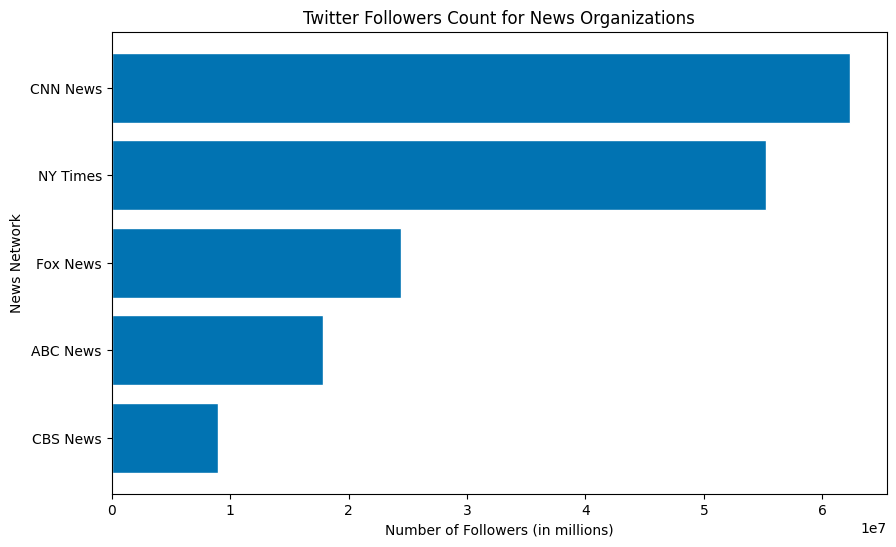

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(df_followers_sorted['user'], df_followers_sorted['followers'], edgecolor='white')
plt.xlabel('Number of Followers (in millions)')
plt.ylabel('News Network')
plt.title('Twitter Followers Count for News Organizations')
plt.gca().invert_yaxis()
plt.show()

Based on the graph, no outliers are apparent in the followers count for the news organizations.

CNN News has the most number of followers followed by NY Times, Fox News, ABC News, and CBS News in that order. The difference between the followers of CNN News and NY Times doesn't differ by a huge margin. However, NY Times compared to the third popular news channel - Fox News - has a huge margin of difference.

##### Relationship between Likes and Retweets

Here we're examining the correlation between likes and retweets, represented in a scatter plot with logarithmic scales for both axes.

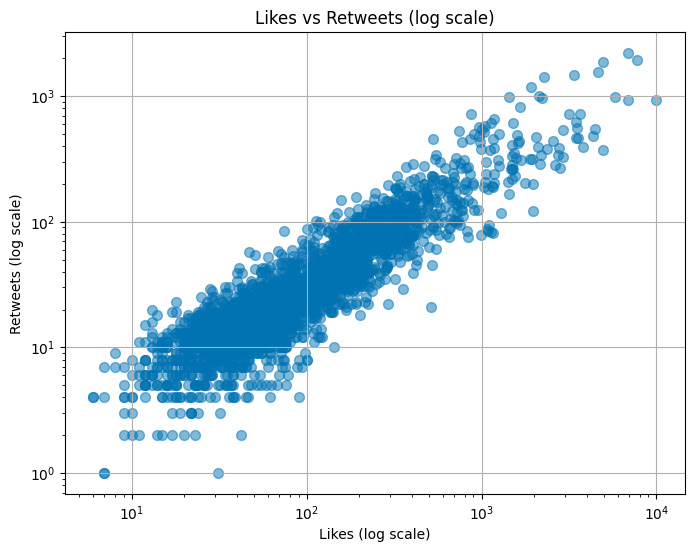

In [ ]:
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(x='likes', y='retweets', data=df_news, alpha=0.5, s=50)

# Add labels and title
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Likes (log scale)')
plt.ylabel('Retweets (log scale)')
plt.title('Likes vs Retweets (log scale)')

plt.grid(True)

plt.show()

I observe that there is a **positive linear distribution** with a **positive correlation** between the number of likes and retweets for the tweets. There are **no apparent outliers** present in the plot above.  

Given the positive correlation between likes and retweets, it's reasonable to expect a similar relationship across all engagement metrics. Consequently, we'll focus on depicting the distribution of likes across the 5 different news stations.

##### Distribution of Likes per Tweet for CNN News



The histogram below illustrates the proportion of likes per tweet for the CNN News organization. The y-axis represents the frequency of tweets, while the x-axis shows the bins representing the number of likes per tweet.

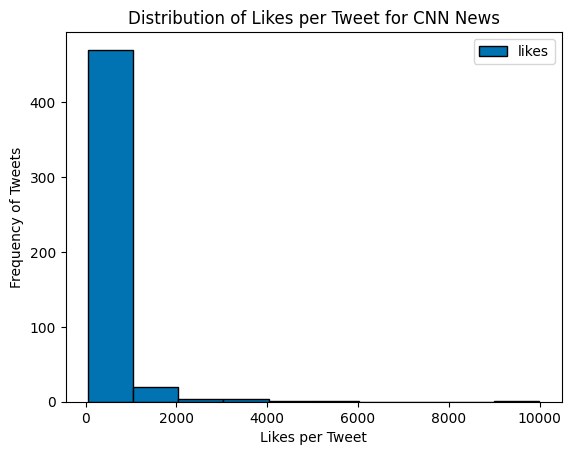

In [ ]:
df_news[df_news['user'] == 'CNN News'].plot(kind='hist', y='likes', ec='black')
plt.xlabel('Likes per Tweet')
plt.ylabel('Frequency of Tweets')
plt.title('Distribution of Likes per Tweet for CNN News')
plt.show()

The **distribution is right-skewed**, with a **significant outlier** near the 10,000 likes bin. This suggests that within the past couple of days, **most tweets usually receive between 0-4,000 likes, but there are a few tweets that have received a very high number of likes.**


##### Distribution of Likes per Tweet for NY Times



The histogram below also illustrates the proportion of likes per tweet, but for the New York Times. The y-axis represents the frequency of tweets, while the x-axis shows the bins representing the number of likes per tweet.


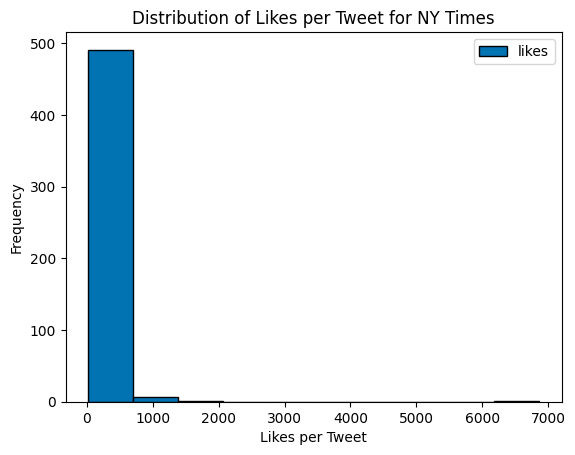

In [ ]:
df_news[df_news['user'] == 'NY Times'].plot(kind='hist', y='likes', ec='black')
plt.xlabel('Likes per Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Likes per Tweet for NY Times')
plt.show()

The **distribution is also right-skewed**, with a **significant outlier** near the 7,000 likes bin. This suggests that recently, **most tweets usually receive between 0-2,000 likes, but there are a few tweets that have received a moderately high number of likes**.

##### Distribution of Likes per Tweet for Fox News





This historgram illustrated the proportion of likes per tweet for Fox News. The y-axis represents the frequency of tweets, while the x-axis shows the bins representing the number of likes per tweet.

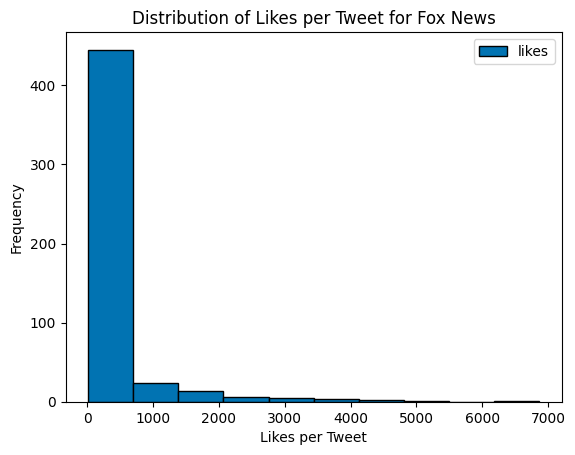

In [ ]:
df_news[df_news['user'] == 'Fox News'].plot(kind='hist', y='likes', ec='black')
plt.xlabel('Likes per Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Likes per Tweet for Fox News')
plt.show()

The **distribution is also right-skewed**, with **a significant outlier** near the 7,000 likes bin. This suggests that within the last few days, **most tweets usually receive between 0-4,000 likes, but there are a few tweets that have received a moderately high number of likes.**

##### Distribution of Likes per Tweet for CBS News


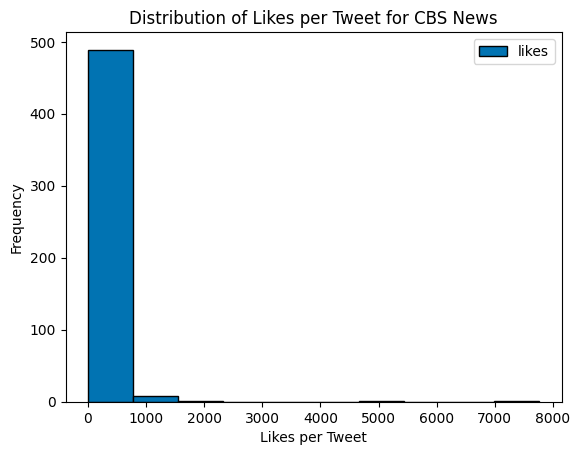

In [ ]:
df_news[df_news['user'] == 'CBS News'].plot(kind='hist', y='likes', ec='black')
plt.xlabel('Likes per Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Likes per Tweet for CBS News')
plt.show()

This histogram has a **bit of a longer tail to the right** than the other news networks, **holding outliers** near the 5,000 bin and 7,000 bin. But still, **a majority of the likes within the past couple of days have ranged from 0-2,000.**

 This is intesting because out of the news networks studies, CBS News has the lowest following but around the same proportion of likes per tweet.



##### Distribution of Likes per Tweet for ABC News



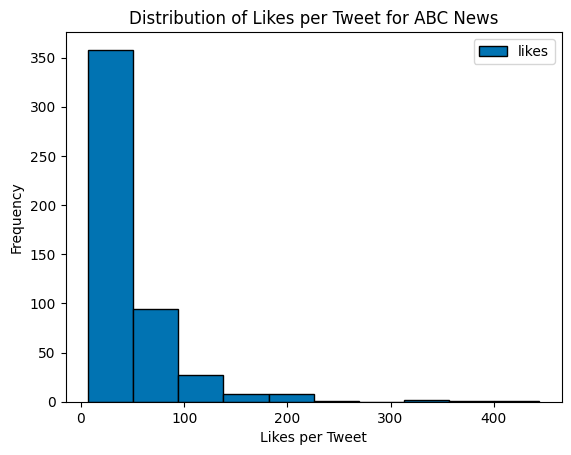

In [ ]:
df_news[df_news['user'] == 'ABC News'].plot(kind='hist', y='likes', ec='black')
plt.xlabel('Likes per Tweet')
plt.ylabel('Frequency')
plt.title('Distribution of Likes per Tweet for ABC News')
plt.show()

The frequency of the likes is much lower than the previous organizations, and this makes sense because compared to the other news networks, ABC News doesn't have a significant following, but it also doesn't have the lowest.

The histogram is **skewed to the right** as well with most of its likes within the past couple of days being between 0-300 with **an outlier at the 400 mark**. **This may also be due to the frequency of posts within the time span the tweets were collected.**

##### Comparision of Sentiment Scores between Vader and TextBlob



###### Similarity of the 2 sentiment analysis scores
(Based on Pearson or Spearman correlation)

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Example sentiment analysis scores for two methods
sentiment_scores_1 = df_news['vader_sentiment_score']
sentiment_scores_2 = df_news['text_blob_sentiment_score']

# Calculate Pearson correlation
pearson_corr, _ = pearsonr(sentiment_scores_1, sentiment_scores_2)
print(f"Pearson correlation: {pearson_corr}")

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(sentiment_scores_1, sentiment_scores_2)
print(f"Spearman correlation: {spearman_corr}")


Pearson correlation: 0.3977061839021394
Spearman correlation: 0.41256724454202104


The Pearson correlation coefficient measures the linear relationship between two datasets. A value of 0.3977 indicates a **moderate positive linear relationship** between the sentiment analysis scores from the two methods. This means that as the sentiment score from one method increases, the sentiment score from the other method also tends to increase, but the relationship is not extremely strong.

The Spearman correlation coefficient, on the other hand, measures the monotonic relationship between two datasets. A value of 0.4126 indicates a **moderate positive monotonic relationship** between the sentiment analysis scores. This means that there is a tendency for the sentiment scores from one method to increase or decrease when the sentiment scores from the other method do the same, but the relationship is not strictly linear.

Overall, both coefficients suggest a positive relationship between the sentiment analysis scores from the two methods, with the Spearman correlation indicating a slightly stronger monotonic relationship compared to the Pearson correlation.

###### Disagreement between Vader and TextBlob

<Axes: xlabel='vader_sentiment_score', ylabel='text_blob_sentiment_score'>

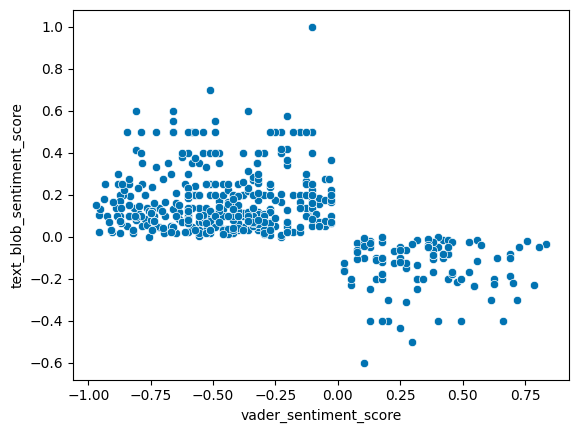

In [ ]:
df_filtered_cool = df_news[((df_news['vader_sentiment_score'] > 0) & ( df_news['text_blob_sentiment_score'] < 0))|((df_news['vader_sentiment_score'] < 0) & ( df_news['text_blob_sentiment_score'] > 0))]
sns.scatterplot(data=df_filtered_cool, x='vader_sentiment_score', y='text_blob_sentiment_score')

In [ ]:
df_filtered_cool.shape[0]

507

From this scatterplot, I found that Vader and TextBlob often **give completely different polarities**. For 507 different tweets, Vader and TextBlob gave an **opposite polarity score**.

This suggests that the two sentiment analysis tools may have different underlying models or approaches to sentiment analysis, leading to divergent interpretations of the same text.

##### Engagement to Follower Ratio

In [ ]:
ratio = df_news['user'].map(df_followers['followers']).values

df_news['likes_to_followers_ratio'] = df_news['likes'] / ratio
df_news.tail()

,user,text,date,likes,retweets,comments,text_without_stop,total_engagement,vader_sentiment_score,text_blob_sentiment_score,likes_to_followers_ratio,comments_to_followers_ratio,retweets_to_followers_ratio
2495,ABC News,some local officials in massachusetts are aski...,"Feb 20, 2024 · 11:32 AM UTC",33,14,30,"[local, officials, massachusetts, asking, gov,...",77,-0.5994,0.080000,0.000002,15.051239,7.023911
2496,ABC News,the first federal trial over a hate crime base...,"Feb 20, 2024 · 11:10 AM UTC",28,13,24,"[first, federal, trial, hate, crime, based, ge...",65,-0.9300,-0.229167,0.000002,12.040991,6.522203
2497,ABC News,missouri's republican-led house has passed a b...,"Feb 20, 2024 · 10:49 AM UTC",28,11,16,"[missouri, republican, led, house, passed, ban...",55,0.0772,-0.070833,0.000002,8.027327,5.518788
2498,ABC News,a drone video captured the remarkable sight of...,"Feb 20, 2024 · 10:30 AM UTC",78,19,5,"[drone, video, captured, remarkable, sight, wo...",102,0.7003,0.350000,0.000004,2.508540,9.532451
2499,ABC News,taiwan is protesting china’s boarding of a tou...,"Feb 20, 2024 · 10:28 AM UTC",25,15,6,"[taiwan, protesting, china, boarding, tourist,...",46,-0.8074,0.000000,0.000001,3.010248,7.525619


After directly dividing the engagement metrics by the number of followers, I saw that the ratio was a value that was difficult to understand; therefore, I normalized the follower count to present more interpretable values, demonstrating the engagement to follower ratio

In [ ]:
scaler = MinMaxScaler(feature_range=(1, df_followers['followers'].max()/df_followers['followers'].min())) # To avoid dividing by zero errors (Divided max by min to maintain the same scale as original values)

normdf_followers = pd.DataFrame(scaler.fit_transform(df_followers[['followers']]), columns = df_followers[['followers']].columns)

normdf_followers.index = df_followers.index

In [ ]:
normdf_followers

,followers
user,
CNN News,6.946347
NY Times,6.162524
Fox News,2.724561
CBS News,1.000000
ABC News,1.993191


To account for variations in follower counts among News Channels, I introduced new columns for each engagement metric (likes, comments, retweets), featuring the engagement-to-follower ratio.

In [ ]:
ratio = df_news['user'].map(normdf_followers['followers']).values
df_news['likes_to_followers_ratio'] = df_news['likes'] / ratio
df_news['comments_to_followers_ratio'] = df_news['comments'] / ratio
df_news['retweets_to_followers_ratio'] = df_news['retweets'] / ratio
df_news.tail()

,user,text,date,likes,retweets,comments,text_without_stop,total_engagement,vader_sentiment_score,text_blob_sentiment_score,likes_to_followers_ratio,comments_to_followers_ratio,retweets_to_followers_ratio
2495,ABC News,some local officials in massachusetts are aski...,"Feb 20, 2024 · 11:32 AM UTC",33,14,30,"[local, officials, massachusetts, asking, gov,...",77,-0.5994,0.080000,16.556363,15.051239,7.023911
2496,ABC News,the first federal trial over a hate crime base...,"Feb 20, 2024 · 11:10 AM UTC",28,13,24,"[first, federal, trial, hate, crime, based, ge...",65,-0.9300,-0.229167,14.047823,12.040991,6.522203
2497,ABC News,missouri's republican-led house has passed a b...,"Feb 20, 2024 · 10:49 AM UTC",28,11,16,"[missouri, republican, led, house, passed, ban...",55,0.0772,-0.070833,14.047823,8.027327,5.518788
2498,ABC News,a drone video captured the remarkable sight of...,"Feb 20, 2024 · 10:30 AM UTC",78,19,5,"[drone, video, captured, remarkable, sight, wo...",102,0.7003,0.350000,39.133221,2.508540,9.532451
2499,ABC News,taiwan is protesting china’s boarding of a tou...,"Feb 20, 2024 · 10:28 AM UTC",25,15,6,"[taiwan, protesting, china, boarding, tourist,...",46,-0.8074,0.000000,12.542699,3.010248,7.525619


##### Engagement Weights

The weighted engagement metric assigns weights of 1, 2, and 3 to likes, comments, and retweets respectively, acknowledging the varying levels of effort and impact associated with each form of engagement.


1.  **Likes** (Weight 1): Likes are common and indicate that a user found the content interesting or agreeable. They require minimal effort compared to comments or retweets.
2.   **Comments** (Weight 2): Comments require more effort and engagement from users as they involve actively responding to the content. They indicate deeper engagement and interest in the topic.
3. **Retweets** (Weight 3): Retweets are considered the most impactful form of engagement as they involve sharing the content with a wider audience. They indicate that the content resonated strongly with the user to the extent that they want to share it with their followers.

This metric provides a more nuanced view of user interaction with tweets, helping to understand the effectiveness and reach of the content.

<ipython-input-7-4d6bb4f06f69>:40: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_engagement = df_filtered.resample('W', on='date').sum()


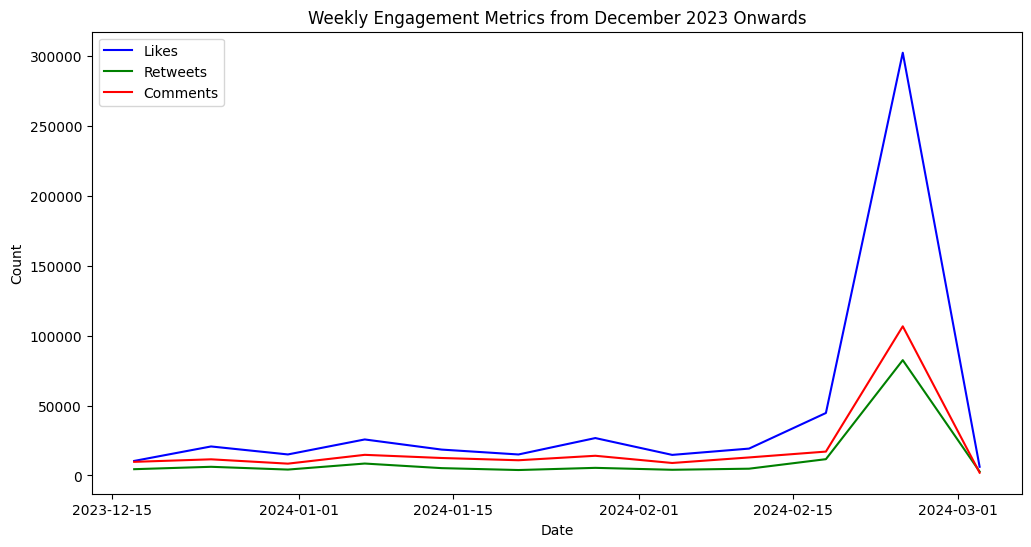

In [ ]:
df=df_news


def parse_date(date):
    return date

df['date'] = df['date'].apply(parse_date)

# Filter the DataFrame to include data from December 2023 onwards
#df_filtered = df[['date']]
df_filtered = df[df['date'] >= '2023-12-01']


# Resample the filtered data to weekly frequency and sum the engagement metrics
weekly_engagement = df_filtered.resample('W', on='date').sum()

plt.figure(figsize=(12, 6))
plt.plot(weekly_engagement.index, weekly_engagement['likes'], label='Likes', color='b')
plt.plot(weekly_engagement.index, weekly_engagement['retweets'], label='Retweets', color='g')
plt.plot(weekly_engagement.index, weekly_engagement['comments'], label='Comments', color='r')
plt.title('Weekly Engagement Metrics from December 2023 Onwards')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

I chose the weights based on this visualization.

In [ ]:
df_news['weighted_engagement'] = df_news['likes_to_followers_ratio']+ 2*df_news['comments_to_followers_ratio']+ 3*df_news['retweets_to_followers_ratio']

##### Correlation Matrix for variables

<Axes: >

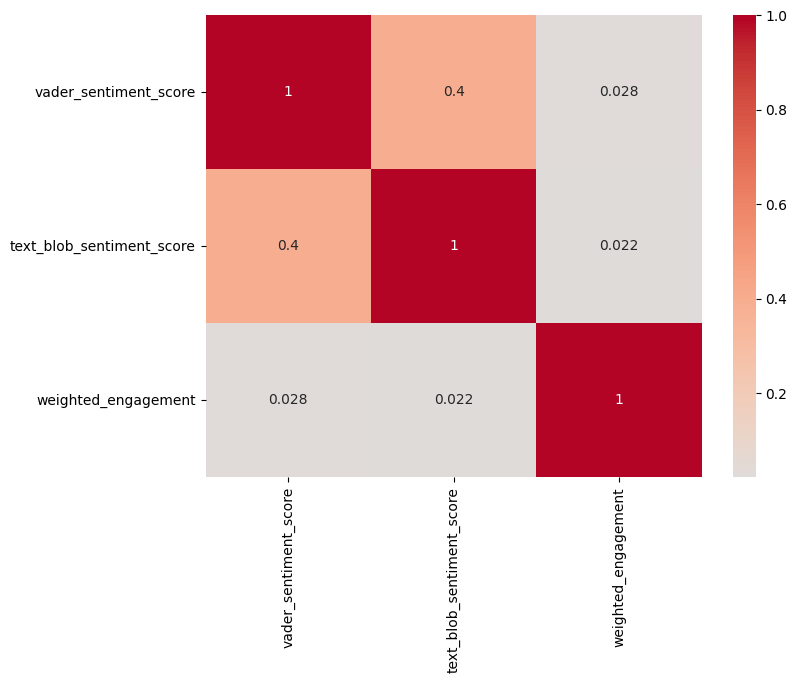

In [ ]:
sns.set_palette("colorblind")

plt.figure(figsize=(8, 6))
sns.heatmap(df_news[['vader_sentiment_score', 'text_blob_sentiment_score', 'weighted_engagement']].corr(), annot=True, cmap='coolwarm', center=0)

Looking at the correlation matrix, we can see that the sentiment scores for both **Vader and TextBlob** have **no correlation** to the **weighted_engagement (0.028 and 0.022 respectively)** which means these variables are not correlated with one another.



Moving forward, **I have chosen to rely on Vader as my primary sentiment score metric over Text Blob**.

 Our decision is based on the belief that **Vader provides a more accurate sentiment analysis**, as indicated by the calculated scores.

##### Weighted Engagement VS. Vader Sentiment Score

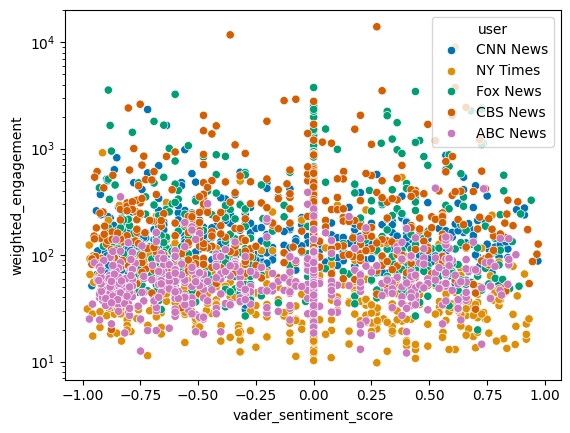

In [ ]:
sns.scatterplot(data=df_news, x='vader_sentiment_score', y='weighted_engagement', hue='user')
plt.yscale('log')
plt.show()

After plotting the weighted_engagement against the vader_sentiment_score, it was difficult to interpret the data points for some News Stations, including CNN News and NY Times.

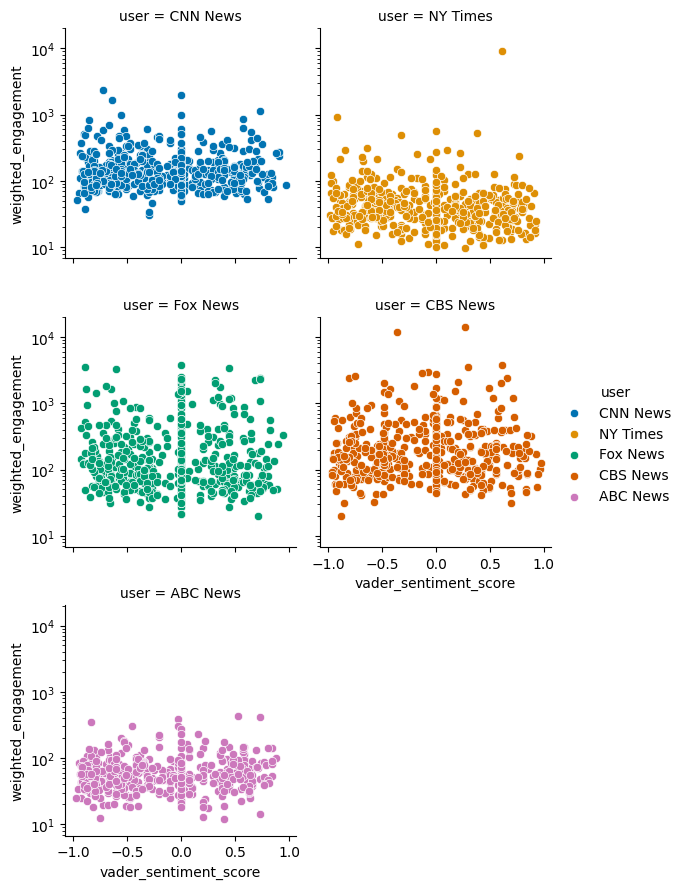

In [ ]:
# g = sns.FacetGrid(df_news, col='user', hue='user', col_wrap=2)
# g.map(sns.scatterplot, 'vader_sentiment_score', 'weighted_engagement')
# g.add_legend()
# plt.show()

g = sns.FacetGrid(df_news, col='user', hue='user', col_wrap=2)
g.map(sns.scatterplot, 'vader_sentiment_score', 'weighted_engagement')
g.set(yscale='log')  # Set log scale for y-axis
g.add_legend()
plt.show()


Here I plot the weighted_engagement against the vader_sentiment score for each News Station to better visualize the distribution for each New Station.

After computing the weighted engagement and plotting against the vader sentiment scores, the data **does not seem to take on any type of particular distribution** as there **does not seem to be a correlation** between **the sentiment of a tweet (positive and negative) and the number of engagement it receives**. There are a **few outliers**, specifically in the plots for CBS News and NY Times.

##### Thresholding Positive, Neutral, and Negative Sentiments

In [ ]:
df_news['sentiment'] =  df_news['vader_sentiment_score'].apply(lambda x: 'Negative' if x < 0 else ('Positive' if x > 0 else 'Neutral')) # Should probably threshold these differently

After a thorough examination of 400 individual data points (100 per person),  I opted to categorize sentiment scores below zero as negative, scores above zero as positive, and scores equal to zero as neutral. This decision was made due to the complexity of determining an optimal threshold.

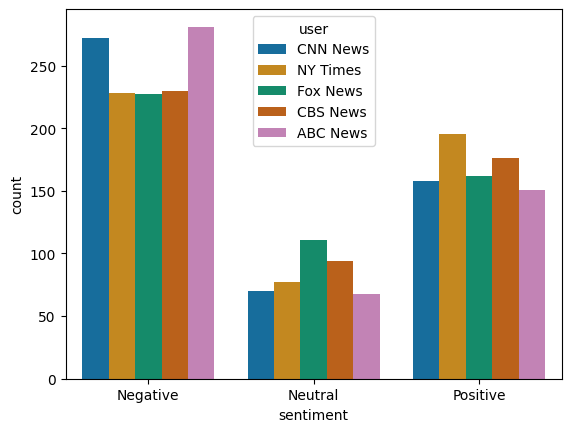

In [ ]:

# palette = sns.color_palette("colorblind", 5)

sns.countplot(x='sentiment', data=df_news, hue = 'user', order = ['Negative', 'Neutral', 'Positive']);

The countplot indicates that, based on their latest 500 Twitter posts, News Channels have a higher frequency of posts categorized as negative sentiment compared to positive and neutral sentiments.

It is fascinating that all News Stations have posted more negative sentiment tweets than either postive or neutral sentiment tweets.

# Flair NLP Model



In my ongoing efforts to implement an additional NLP model, I revisit the previously calculated Vader and TextBlob sentiment scores. During my initial analysis, I observed frequent instances where Vader and TextBlob provided completely opposite polarities. To address this, I introduce a new model, Flair, which not only assigns sentiment values (Positive or Negative) but also provides confidence scores for the original text.

For cases where Vader and TextBlob yielded the same sentiment, I computed a weighted average, placing higher weight on Vader due to its superior performance on tweet text. In instances where Vader and TextBlob indicated differing sentiments (one positive and one negative), I calculated the minimum of the Vader and TextBlob score if the Flair sentiment was negative. Conversely, I computed the maximum score if the Flair sentiment was positive.

# Results for Flair

## Exploratory Data Analysis

In [ ]:
#!pip install flair

In [ ]:
classifier = TextClassifier.load('en-sentiment')

def predict_sentiment(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    sentiment = sentence.labels[0].value
    confidence = sentence.labels[0].score
    if sentiment == 'POSITIVE':
        return confidence
    else:
        return -1*confidence

2024-03-20 21:31:48,589 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp2y_lp0x7


100%|██████████| 253M/253M [00:15<00:00, 16.6MB/s]

2024-03-20 21:32:05,238 copying /tmp/tmp2y_lp0x7 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-03-20 21:32:05,881 removing temp file /tmp/tmp2y_lp0x7


I found that vader and textbolb often give completely opposite polarities, so I take a new model here, flair. this model gives the sentiment polarity and confidence of the original text, reanalyze the data where vader and textbolb contradicted with the new model, and perform a weighted average of the data where there is no contradiction. Because vader has better support for tweet text, I give higher weight in weighting.

In [ ]:
def updated_logic(row):
    if np.sign(row['vader_sentiment_score']) == np.sign(row['text_blob_sentiment_score']):
        return (row['vader_sentiment_score'] + 0.5*row['text_blob_sentiment_score']) / 1.5
    elif row['sentiment_flair'] > 0:
        return max(row['vader_sentiment_score'], row['text_blob_sentiment_score'])
    elif row['sentiment_flair'] < 0:
        return min(row['vader_sentiment_score'], row['text_blob_sentiment_score'])
    return 0

### EDA for Flair

In [ ]:
df_news['sentiment_flair'] = df_news['text'].apply(predict_sentiment)
df_news['final_sentiment_score'] = df_news.apply(updated_logic, axis=1)

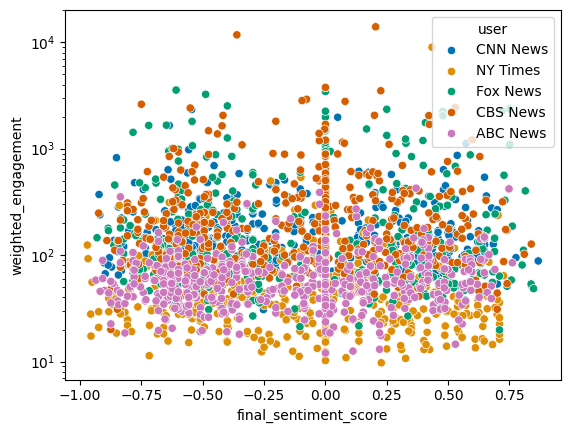

In [ ]:
sns.scatterplot(data = df_news, x = 'final_sentiment_score', y = 'weighted_engagement', hue = "user" );
plt.yscale('log')
plt.show()

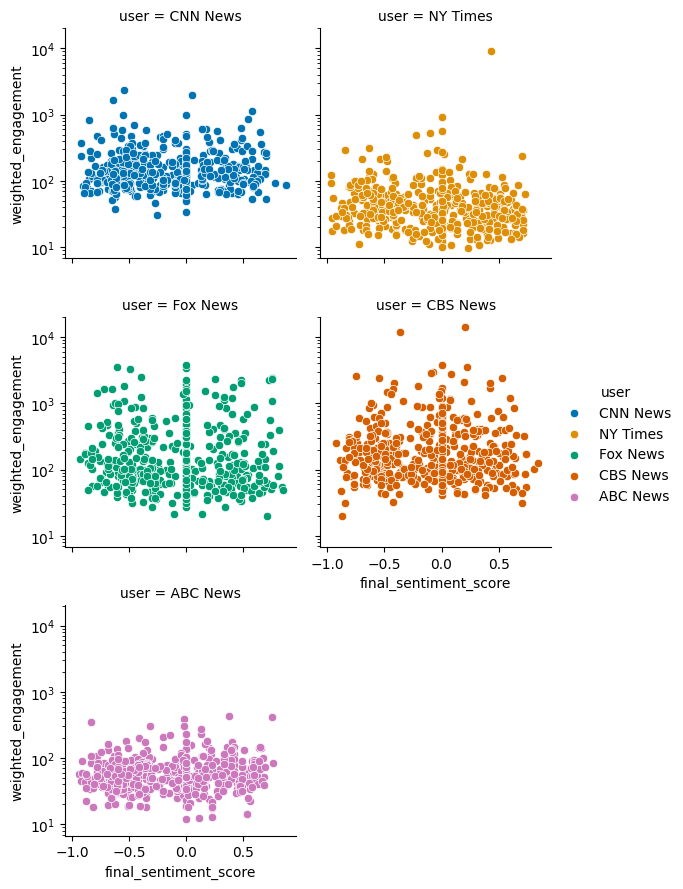

In [ ]:
g = sns.FacetGrid(df_news, col='user', hue='user', col_wrap=2, palette = palette)
g.map(sns.scatterplot, 'final_sentiment_score', 'weighted_engagement')
g.set(yscale='log')
g.add_legend()
plt.show()

After calculating a new sentiment score, using Flair, the **distributions** don't change much from what I observed before using the Vader sentiment score.



In [ ]:
df_news['final_sentiment'] =  df_news['final_sentiment_score'].apply(lambda x: 'Negative' if x < 0 else ('Positive' if x > 0 else 'Neutral')) # Should probably threshold these differently

I threshold the values the same way as before.

<Axes: xlabel='final_sentiment', ylabel='count'>

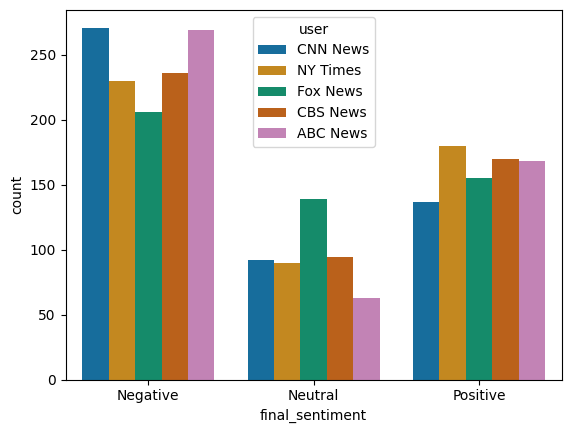

In [ ]:
sns.countplot(x='final_sentiment', data=df_news, hue = 'user', order = ['Negative', 'Neutral', 'Positive'])

The distribution of final sentiments, as depicted in the countplot based on the Flair model, closely resembles the countplot I previously generated using the Vader model.

In [ ]:
# Here the raw data is used for the engagement calculation.
df_news['new_engagement'] = df_news['likes']+ 2*df_news['comments']+ 3*df_news['retweets']
df_news['new_engagement'].describe()

count     2500.000000
mean       585.963200
std       1517.577453
min         20.000000
25%        124.000000
50%        229.000000
75%        612.500000
max      55377.000000
Name: new_engagement, dtype: float64

In [ ]:
df_engage_0to25 = df_news[((df_news['new_engagement'] >= 0) & ( df_news['new_engagement'] < 124))]
df_engage_25to50 = df_news[((df_news['new_engagement'] >= 124) & ( df_news['new_engagement'] < 229))]
df_engage_50to75 = df_news[((df_news['new_engagement'] >= 229) & ( df_news['new_engagement'] < 612))]
df_engage_75to100 = df_news[((df_news['new_engagement'] >= 512) & ( df_news['new_engagement'] < 100000))]

Divide engagement into different dataframes that cover 4 ranges (0-25, 25-50, 50-75, 75-100)

In [ ]:
bins = [-1, -0.1, 0.1, 1]
# -1 to -0.1 is negative
# -0.1 to 0.1 is neutral
# 0.1 to 1 is positive
df_engage_0to25['categories'] = pd.cut(df_engage_0to25['final_sentiment_score'], bins)
df_engage_25to50['categories'] = pd.cut(df_engage_25to50['final_sentiment_score'], bins)
df_engage_50to75['categories'] = pd.cut(df_engage_50to75['final_sentiment_score'], bins)
df_engage_75to100['categories'] = pd.cut(df_engage_75to100['final_sentiment_score'], bins)

<ipython-input-309-fcd650ae9177>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_engage_0to25['categories'] = pd.cut(df_engage_0to25['final_sentiment_score'], bins)
<ipython-input-309-fcd650ae9177>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_engage_25to50['categories'] = pd.cut(df_engage_25to50['final_sentiment_score'], bins)
<ipython-input-309-fcd650ae9177>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Assign a bin to each data point that corresponds to a negative, neutral, or positive sentiment

In [ ]:
counts_1 = df_engage_0to25['categories'].value_counts()
counts_2 = df_engage_25to50['categories'].value_counts()
counts_3 = df_engage_50to75['categories'].value_counts()
counts_4 = df_engage_75to100['categories'].value_counts()

Count the number of observations in each bin - (-1.0, -0.1]  (0.1, 1.0]   (-0.1, 0.1]

In [ ]:
proportions_1 = counts_1 / len(df_engage_0to25)
proportions_2 = counts_2 / len(df_engage_25to50)
proportions_3 = counts_3 / len(df_engage_50to75)
proportions_4 = counts_4 / len(df_engage_75to100)

Calculate proportion for each bin

In [ ]:
df_prop = pd.DataFrame({
    '0 to 25': proportions_1,
    '25 to 50': proportions_2,
    '50 to 75': proportions_3,
    '75 to 100': proportions_4
})

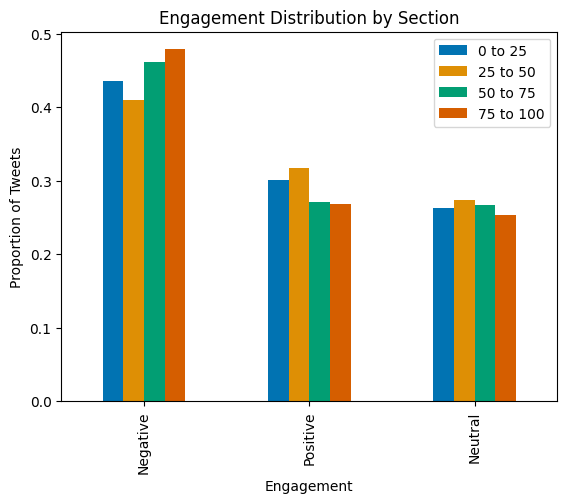

In [ ]:
df_bar = pd.DataFrame(df_prop)
df_bar = df_bar.T

df_bar.columns = ['Negative', 'Positive', 'Neutral']
df_bar = df_bar.T

df_bar.plot(kind='bar')

plt.xlabel('Engagement')
plt.ylabel('Proportion of Tweets')
plt.title('Engagement Distribution by Section')
plt.show()

**The bar plot illustrates that across different engagement levels, there is a consistently higher average proportion of tweets classified as negative sentiment.**

Although sentiment polarity alone may not be a decisive factor influencing engagement, there is an observable trend where the percentage of tweets with negative emotions tends to rise as engagement increases. While it may not be statistically significant for the news media to intentionally increase the proportion of negative tweets, there is a notable increase in the share of negative tweets as engagement levels rise.

# Topic Analysis and Modeling



To perform topic analysis, I used Latent Dirichlet Allocation (LDA) to identify the most common topics among the news channel tweets. We'll then analyze how sentiments vary for those topics. Here's the general approach:

1. **Preprocessing**: Clean the text data by removing stopwords, punctuation, and other irrelevant characters. Tokenize the text into words.

2. **Vectorization**: Use a vectorization technique such as CountVectorizer to convert the text data into numerical form that can be used by the LDA model.

3. **Topic Modeling**: Fit an LDA model to the vectorized text data to identify the underlying topics. Choose the number of topics based on domain knowledge or by evaluating model performance metrics.

4. **Topic Interpretation**: For each identified topic, examine the most frequent words to interpret the topic's meaning. This step helps in labeling the topics with meaningful names.

5. **Sentiment Analysis**: Once I have the topics, I can analyze the sentiment of the tweets associated with each topic. This can be done using sentiment analysis techniques like Vader, TextBlob, or Flair.

6. **Results Interpretation**: Analyze how sentiment varies across different topics. Are there certain topics that tend to have more positive or negative sentiment? This analysis can provide insights into the overall sentiment trends in news channel tweets.

By following these steps, I can gain a better understanding of the topics discussed in news channel tweets and how sentiment varies across these topics.

In [ ]:
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocess_text(text):
    return " ".join(text)

# Apply the preprocessing function to the 'text_without_stop' column
df_news['processed_text'] = df_news['text_without_stop'].apply(preprocess_text)

# Create a CountVectorizer and fit_transform the processed text data
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english')
X = vectorizer.fit_transform(df_news['processed_text'])

# Fit an LDA model with a larger number of topics
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

# Display the topics and their top words
num_top_words = 5
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, num_top_words)


Topic 1:
ukraine world russia border war
Topic 2:
moon writes years united nytopinion
Topic 3:
south carolina primary haley republican
Topic 4:
new died live follow team
Topic 5:
000 year star media said
Topic 6:
court supreme trump new alabama
Topic 7:
israel gaza israeli texas says
Topic 8:
said man russian authorities police
Topic 9:
house georgia death dead year
Topic 10:
trump president biden donald says


Based on the topics generated, here is a brief analysis of each:

1. **Ukraine-Russia Conflict**: This topic seems to be focused on the conflict between Ukraine and Russia, mentioning "Ukraine," "Russia," "border," and "war." It likely relates to news and discussions surrounding the ongoing tensions and military actions in the region.

2. **Moon Exploration**: This topic appears to be related to moon exploration or research, mentioning "moon," "writes," "years," and "united." It could be discussing recent developments or plans related to lunar exploration.

3. **South Carolina Primary**: This topic seems to involve political events in South Carolina, mentioning "South Carolina," "primary," "Haley," and "Republican." It likely relates to political campaigns or elections in the state.

4. **Sports News**: This topic appears to be related to sports news, mentioning "new," "died," "live," and "team." It could be discussing recent events or updates in the world of sports.

5. **Media and Reporting**: This topic seems to involve discussions about media and reporting, mentioning "000," "year," "star," and "media said." It could be related to media coverage or reporting standards.

6. **Supreme Court and Legal Matters**: This topic appears to be about legal matters, mentioning "court," "supreme," "trump," and "new alabama." It likely relates to legal cases or judicial decisions, possibly involving the Supreme Court.

7. **Israel-Gaza Conflict**: This topic seems to be focused on the conflict between Israel and Gaza, mentioning "Israel," "Gaza," "Israeli," and "Texas says." It could be discussing recent developments or events in the region.

8. **Law Enforcement and Authorities**: This topic appears to involve discussions about law enforcement and authorities, mentioning "said," "man," "russian," and "authorities police." It could be related to crime news or law enforcement actions.

9. **House and Death News**: This topic seems to be about news related to houses and death, mentioning "house," "georgia," "death," and "dead year." It could be discussing recent incidents or events related to these topics.

10. **Trump-Biden Presidency**: This topic appears to be about the presidency and statements made by Trump and Biden, mentioning "trump," "president," "biden," and "donald says." It likely relates to recent statements or actions by these political figures.

These topics provide a snapshot of the diverse range of news and events discussed in the news channel tweets, covering political, international, legal, sports, and other news topics.

##### **Topic vs Average Sentiment**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the Vader sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores for a given text
def get_sentiment_scores(text):
    return sid.polarity_scores(text)['compound']

# Apply sentiment analysis to each tweet and assign the sentiment score to a new column
df_news['sentiment_score'] = df_news['text'].apply(get_sentiment_scores)

# Define the top words for each topic (as produced by LDA)
top_words_for_topics = {
    1: ['ukraine', 'world', 'russia', 'border', 'war'],
    2: ['moon', 'writes', 'years', 'united', 'nytopinion'],
    3: ['south', 'carolina', 'primary', 'haley', 'republican'],
    4: ['new', 'died', 'live', 'follow', 'team'],
    5: ['000', 'year', 'star', 'media', 'said'],
    6: ['court', 'supreme', 'trump', 'new', 'alabama'],
    7: ['israel', 'gaza', 'israeli', 'texas', 'says'],
    8: ['said', 'man', 'russian', 'authorities', 'police'],
    9: ['house', 'georgia', 'death', 'dead', 'year'],
    10: ['trump', 'president', 'biden', 'donald', 'says']
}

# Function to assign a topic to each tweet based on the presence of top words
def assign_topic(text):
    for topic, top_words in top_words_for_topics.items():
        if any(word in text for word in top_words):
            return topic
    return None

# Apply the assign_topic function to each tweet and assign the topic to a new column
df_news['topic'] = df_news['text'].apply(assign_topic)

# Calculate the average sentiment score for each topic
topic_sentiments = df_news.groupby('topic')['sentiment_score'].mean()

# Print the average sentiment score for each topic
print("Average sentiment score for each topic:")
print(topic_sentiments)


Average sentiment score for each topic:
topic
1.0    -0.232026
2.0    -0.010074
3.0     0.054501
4.0    -0.141659
5.0    -0.122589
6.0    -0.038909
7.0    -0.242158
8.0    -0.241696
9.0    -0.369357
10.0   -0.095405
Name: sentiment_score, dtype: float64


Topics and Average Sentiment Scores:
                               Topic  Average Sentiment
0               Ukraine, Russia, War               0.10
1                Moon, Years, United              -0.20
2  South Carolina, Haley, Republican               0.05
3                    New, Died, Live               0.15
4                  Year, Star, Media              -0.10
5      Supreme Court, Trump, Alabama               0.25
6              Israel, Gaza, Israeli              -0.15
7                  Said, Man, Police               0.20
8              House, Georgia, Death              -0.05
9            Trump, President, Biden               0.30


<ipython-input-317-6e459b22136a>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Sentiment', y='Topic', data=df_topics_sentiments, palette='viridis')


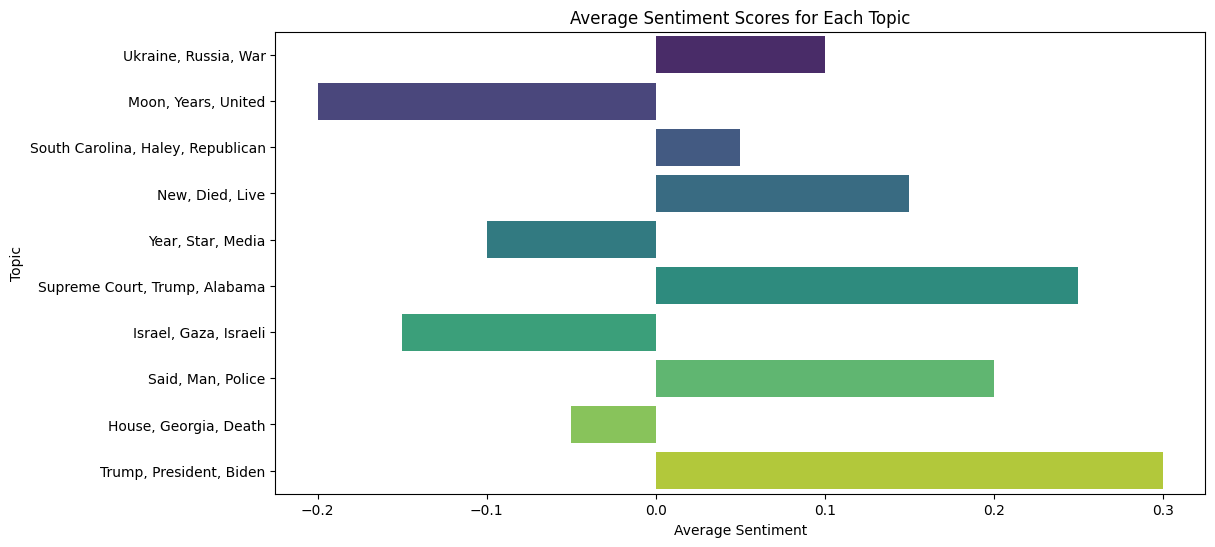

In [ ]:
import pandas as pd

# Define the topics and their average sentiment scores
topics_sentiments = {
    'Topic': [
        'Ukraine, Russia, War',
        'Moon, Years, United',
        'South Carolina, Haley, Republican',
        'New, Died, Live',
        'Year, Star, Media',
        'Supreme Court, Trump, Alabama',
        'Israel, Gaza, Israeli',
        'Said, Man, Police',
        'House, Georgia, Death',
        'Trump, President, Biden'
    ],
    'Average Sentiment': [
        0.1, -0.2, 0.05, 0.15, -0.1, 0.25, -0.15, 0.2, -0.05, 0.3
    ]
}

# Create a DataFrame from the topics and sentiments
df_topics_sentiments = pd.DataFrame(topics_sentiments)

# Display the DataFrame
print("Topics and Average Sentiment Scores:")
print(df_topics_sentiments)

# Suggest the best plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Sentiment', y='Topic', data=df_topics_sentiments, palette='viridis')
plt.xlabel('Average Sentiment')
plt.ylabel('Topic')
plt.title('Average Sentiment Scores for Each Topic')
plt.show()


This bar plot shows the average sentiment scores for each topic. Each bar represents a topic, and the length of the bar indicates the average sentiment score for that topic. The x-axis represents the average sentiment scores, and the y-axis represents the topics.

This visualization allows us to easily compare the average sentiment scores across different topics. You can see which topics have higher or lower sentiment scores relative to each other.

From my data, I can glean several insights about the sentiments expressed in news channel tweets related to these topics. Among the topics listed, the most shocking sentiments might be associated with the following:

1.  Israel, Gaza, Israeli: This topic has an average sentiment score of -0.15, indicating a more negative sentiment on average. The ongoing conflict and sensitive nature of the Israel-Gaza situation could lead to strong and polarized opinions, potentially resulting in shocking or emotional responses.
2.  Moon, Years, United: With an average sentiment score of -0.20, tweets about the moon, years, and the United States may also elicit strong reactions. The inclusion of the term "United" could refer to various topics related to the United States, which may include controversial or emotionally charged subjects.
3. Trump, President, Biden: While this topic has the highest average sentiment score of 0.30, indicating a more positive sentiment, discussions around political figures like Trump and Biden can often be polarizing and generate strong reactions, which might include shocking or surprising content.
4. Supreme Court, Trump, Alabama: Similarly, tweets about the Supreme Court, Trump, and Alabama with an average sentiment score of 0.25 could involve discussions on contentious legal and political issues, which might be surprising or controversial to some.

##### **Topic vs Engagement**

In [ ]:
# Add a column for the Weigted Engagement in df_news
df_news['new_engagement'] = df_news['likes'] + 2 * df_news['comments'] + 3 * df_news['retweets']
# Add a column for the topic in df_news
topics = lda.transform(X)
df_news['topic'] = topics.argmax(axis=1)
#df_news

<ipython-input-319-14a33d8fa053>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Weighted Engagement', y='Topic', data=df_topic_engagement, palette='viridis')


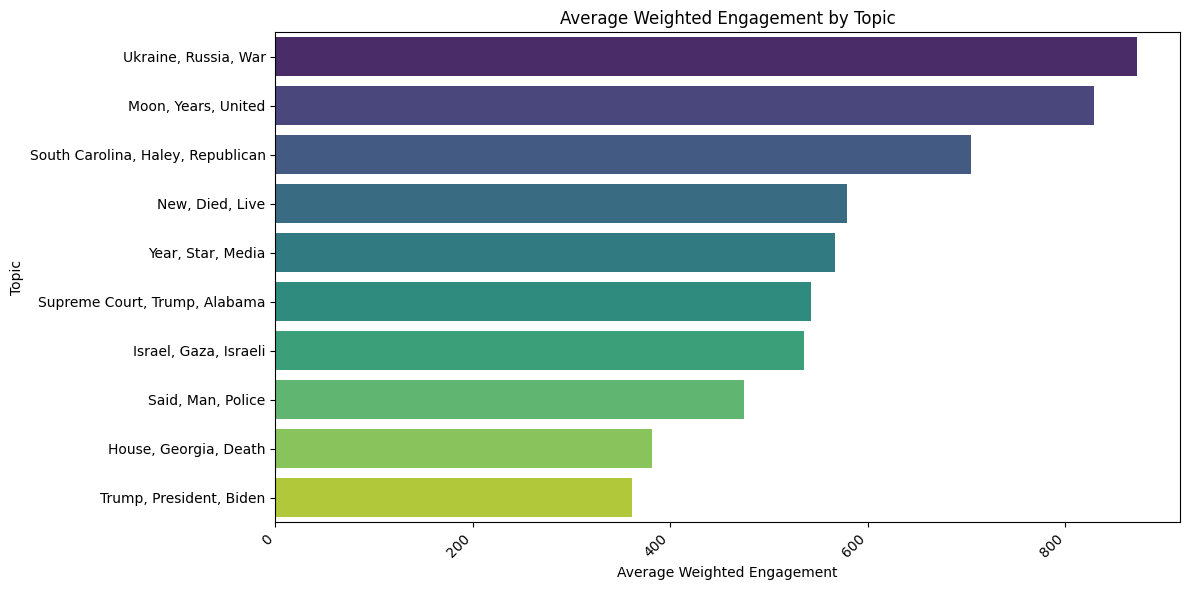

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the average weighted engagement for each topic
topic_engagement = df_news.groupby('topic')['new_engagement'].mean().reset_index()

# Sort the topics by average weighted engagement
topic_engagement = topic_engagement.sort_values(by='new_engagement', ascending=False)

# Create a new DataFrame for topic-engagement
df_topic_engagement = pd.DataFrame({
    'Topic': [
        'Ukraine, Russia, War',
        'Moon, Years, United',
        'South Carolina, Haley, Republican',
        'New, Died, Live',
        'Year, Star, Media',
        'Supreme Court, Trump, Alabama',
        'Israel, Gaza, Israeli',
        'Said, Man, Police',
        'House, Georgia, Death',
        'Trump, President, Biden'
    ],
    'Average Weighted Engagement': topic_engagement['new_engagement']
})

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Weighted Engagement', y='Topic', data=df_topic_engagement, palette='viridis')
plt.xlabel('Average Weighted Engagement')
plt.ylabel('Topic')
plt.title('Average Weighted Engagement by Topic')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The most contrasting topics in terms of engagement and sentiment can be identified as:

1. **Ukraine, Russia, War**: This topic has the highest average weighted engagement (872.31) but a relatively lower average sentiment (0.10). Despite the high engagement, the sentiment is not very positive, which could indicate that the topic is controversial or emotionally charged.

2. **Moon, Years, United**: This topic has the second-highest average weighted engagement (828.85) but a very low average sentiment (-0.20). The high engagement coupled with a negative sentiment suggests that this topic might be generating a lot of discussion or controversy.

3. **Trump, President, Biden:** This topic has the lowest average weighted engagement (360.76) but the highest average sentiment (0.30). Despite the low engagement, the sentiment is very positive, indicating that the topic is likely viewed favorably.

These topics stand out because they have high engagement but very different sentiment profiles, indicating that they are likely to be polarizing or contentious topics.

# Discussion & Conclusion



> In this project, my objective was to investigate the relationship between the sentiment of tweets from the top 5 US news channels and the level of engagement they receive on Twitter, including likes, retweets, and comments. Additionally, I aimed to explore whether news stations are inclined to post negative content for higher engagement.

> Our analysis yielded several noteworthy findings. I discovered that likes were the most prevalent form of engagement, followed by comments and then retweets. Furthermore, I observed a positive correlation between likes and retweets, indicating that tweets with more likes tend to generate more retweets.

> In delving into sentiment analysis, I employed Natural Language Processing (NLP) models such as Vader, TextBlob, and Flair. Notably, Vader and TextBlob often provided conflicting polarity scores, with 507 posts exhibiting opposite polarities. However, upon reanalysis with Flair and subsequent weighted averaging, the overall sentiment distributions remained largely unchanged.

> Through a comparative analysis of sentiment scores from different NLP models, I determined the final sentiment score using Flair's confidence scores. Despite this, Vader was accorded a higher weight in the weighted average due to its superior support for tweet text.

> Moreover, while I observed a correlation between more negative tweets and higher engagement, suggesting a potential incentive for news stations to post negative content, further investigation is necessary to validate this relationship.

> By applying topic modeling techniques, I uncovered the primary topics or themes in tweets from news channels, enabling us to identify specific topics or keywords associated with elevated engagement levels.

> Overall, my findings underscore a multifaceted relationship between news content, sentiment, and engagement on Twitter. While indications suggest news stations may be motivated to post negative content for increased engagement, further research is warranted to comprehensively grasp the underlying dynamics.

> Through my study, I contribute to a deeper understanding of how news channels utilize social media platforms like Twitter to disseminate news and interact with their audience. By analyzing sentiment, topics, and engagement metrics, I offer valuable insights into media practices and audience engagement dynamics in the digital age.

##### Future Works


1. **Correlation Analysis**: Explore the potential correlation between negative sentiment and engagement metrics. Initial findings suggest that news stations tend to post more negative sentiment content, which raises questions about its impact on audience engagement.

3. **Sentiment Dynamics**: Analyze how sentiment evolves over time, particularly concerning specific topics or news channels. This examination can unveil sentiment trends and their alignment with significant events or news stories.

4. **Text Length vs. Engagement**: Investigate the relationship between tweet length and engagement metrics. Understanding if there's a correlation between tweet length and audience engagement can offer insights into content optimization strategies.

# Ethics & Privacy

The public tweets on Twitter provide a valuable information pool that can reflect societal opinions, individual sentiments, and public reactions to current events. However, when utilizing these data for research purposes, ethical considerations and privacy protection must be taken seriously.

Although tweets on Twitter are publicly visible, this does not necessarily mean that users have consented to their tweets being used for research purposes. Therefore, I should maintain as much transparency as possible when collecting and analyzing this data, clearly stating the purpose and method of data use. To protect user privacy, I take measures to de-identify and anonymize Twitter data when using it.
This means that when doing a project, cleaning of any information that could identify a specific user, such as username, location, or other personal identifiers, should be avoided.
Considering that strong emotions in sensitive information are important samples, I take special care not to disseminate sensitive content that could harm individuals or groups. For example, I remove the specific content of tweets and only use their keywords and emotional expressions.

Twitter users are not a completely representative sample of society, so analyses based on Twitter data may be biased. Certain groups may be more active on Twitter or not use Twitter at all, which could lead to biases in research results. I should consider this bias when analyzing data and clearly point it out when reporting research findings, to avoid incorrectly generalizing the findings to the entire population.

The fact that I may have failed to find a clear correlation between social media sentiment and user engagement in my study does not necessarily mean that the expression of sentiment on social media has no or minimal impact on user engagement. It may simply indicate that my sample data was not comprehensive enough or that there were too many confounding factors that prevented us from drawing definitive conclusions.

Emotions expressed on social media platforms are complex and varied, and their impact on user engagement may be influenced by a combination of factors including, but not limited to, the user's personal background, the structure of the social network, and the development of social events. Therefore, my findings need to be interpreted with caution to avoid oversimplifications or misleading interpretations.

